## Car Price by Population - Data Analysis Project 
#### Peter Boster - CS-232
---
Looking for correlation between prices of car listings on Craigslist and population size of the listing location.

#### Hypothesis:
---
The bigger the population, the lower the car prices, due to higher competition and supply of used cars. The smaller the population, the higher the prices, due to scarcity of used cars in the area.

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import datacollector
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

### Step 1:
---
Convert sqlite database into a dataframe for Pandas, and use the id as the index key.

In [2]:
con = sqlite3.connect('cities.db')
df = pd.read_sql_query('SELECT * FROM listings', con)
df = df.set_index('id')
df

,url,price,location_pop
id,,,
1,https://bakersfield.craigslist.org/cto/d/porte...,7000,59797
2,https://bakersfield.craigslist.org/cto/d/baker...,7999,375699
3,https://bakersfield.craigslist.org/cto/d/porte...,11000,59797
4,https://bakersfield.craigslist.org/cto/d/baker...,14000,375699
5,https://bakersfield.craigslist.org/cto/d/baker...,16500,375699
...,...,...,...
20770,https://yubasutter.craigslist.org/cto/d/yuba-c...,3500,66388
20771,https://yubasutter.craigslist.org/cto/d/yuba-c...,9999,66388
20772,https://yubasutter.craigslist.org/cto/d/yuba-c...,3000,66388


In [3]:
df.shape

(20774, 3)

Next I create a subset of the original dataframe that just uses id, price and location population. And a box plot for price because I want to see what prices seem unrealistic.

In [4]:
subset = df[['price', 'location_pop']]
subset

,price,location_pop
id,,
1,7000,59797
2,7999,375699
3,11000,59797
4,14000,375699
5,16500,375699
...,...,...
20770,3500,66388
20771,9999,66388
20772,3000,66388


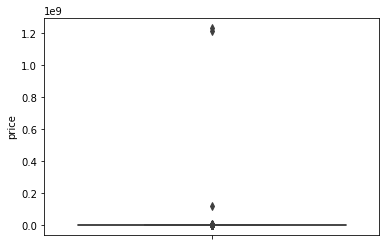

In [5]:
sns.boxplot(y=subset['price'])

1.2 x 10^9 is way to high to be a real price, so I will remove all prices above 100,000, as those cars are more likely to be new.

In [6]:
def removal_function(df):
    for index, row in df.iterrows():
        if int(row['price']) > 100000:
            df.drop(index, inplace=True)
    return df

In [9]:
new_df = removal_function(subset)
new_df.shape

(20731, 2)

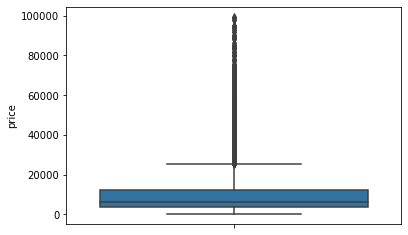

In [10]:
sns.boxplot(y=subset['price'])

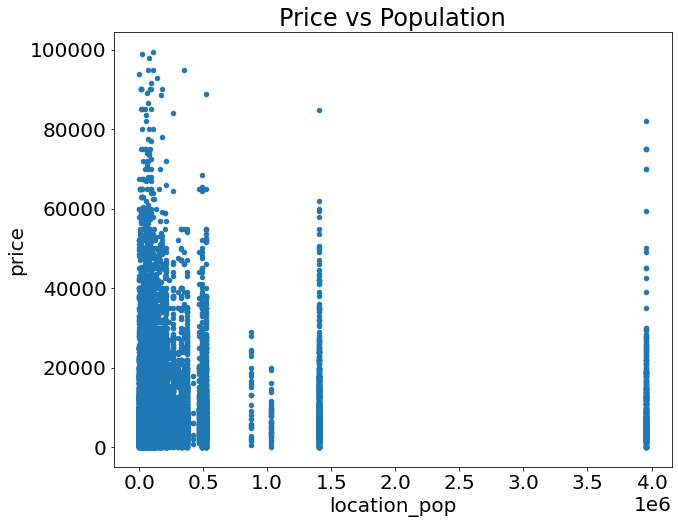

In [11]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
new_df.plot(kind='scatter', x='location_pop', y='price', title='Price vs Population');

In [12]:
new_df.corr()

,price,location_pop
price,1.000000,0.004863
location_pop,0.004863,1.000000


In [13]:
X = new_df['location_pop'] ## population is independent
y = new_df['price']        ## price is dependent
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.082
Method:                 Least Squares   F-statistic:                              1843.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:24:19   Log-Likelihood:                     -2.2711e+05
No. Observations:               20731   AIC:                                  4.542e+05
Df Residuals:                   20730   BIC:                                  4.542e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
location_pop     0.0065      0.000     42.930      0.000       0.006       0.007
==============================================================================
Omnibus:                     9871.554   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82768.246
Skew:                           2.117   Prob(JB):                         0.00
Kurtosis:                      11.826   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""